# Tennis Ace - Multiple Linear Regression

This project aims to create a linear regression model that predicts the outcomes for a tennis player based on their playing habits.

Data from https://en.wikipedia.org/wiki/Association_of_Tennis_Professionals (change hyperlink) will be analysed and modelled. 

# Data dictionary

    Player: name of the tennis player
    Year: year data was recorded

Service Game Columns (Offensive)

    Aces: number of serves by the player where the receiver does not touch the ball
    DoubleFaults: number of times player missed both first and second serve attempts
    FirstServe: % of first-serve attempts made
    FirstServePointsWon: % of first-serve attempt points won by the player
    SecondServePointsWon: % of second-serve attempt points won by the player
    BreakPointsFaced: number of times where the receiver could have won service game of the player
    BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when they had the chance
    ServiceGamesPlayed: total number of games where the player served
    ServiceGamesWon: total number of games where the player served and won
    TotalServicePointsWon: % of points in games where the player served that they won

Return Game Columns (Defensive)

    FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win
    SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win
    BreakPointsOpportunities: number of times where the player could have won the service game of the opponent
    BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance
    ReturnGamesPlayed: total number of games where the player’s opponent served
    ReturnGamesWon: total number of games where the player’s opponent served and the player won
    ReturnPointsWon: total number of points where the player’s opponent served and the player won
    TotalPointsWon: % of points won by the player

Outcomes

    Wins: number of matches won in a year
    Losses: number of matches lost in a year
    Winnings: total winnings in USD($) in a year
    Ranking: ranking at the end of year

In [175]:
#importing the relevant libaries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data Processing

In [176]:
# loading in the csv file and looking at the top 5 rows
tennis_stats = pd.read_csv("tennis_stats.csv")
tennis_stats.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [177]:
# looking at the bottom 5 rows
tennis_stats.tail()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
1716,Yann Marti,2010,0.41,0.66,0.23,0.45,0.50,1,0.75,8,...,0.23,0.36,12,0.67,0.45,0.53,0,1,9117,1062
1717,Mikhail Elgin,2012,0.41,0.60,0.30,0.36,0.60,3,0.60,13,...,0.33,0.43,10,0.40,0.45,0.46,16,20,89755,831
1718,Alexander Kudryavtsev,2012,0.40,0.64,0.21,0.42,0.42,4,0.25,13,...,0.07,0.29,14,0.57,0.40,0.51,0,1,44566,628
1719,Ivan Nedelko,2011,0.37,0.30,0.15,0.24,0.41,1,0.00,5,...,0.00,0.26,6,0.17,0.26,0.26,0,1,17527,264
1720,Alexander Zverev,2013,0.36,0.50,0.40,0.24,0.36,1,0.33,8,...,0.33,0.39,8,0.25,0.37,0.33,0,1,8869,4


In [178]:
# looking at the shape of the dataset i.e. how many rows and columns there are
#there's  1721 rows and 24 columns
#also checking the datatypes to see if they are correct
tennis_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [179]:
#Working out how many unique players are in the dataset
tennis_stats.Player.nunique()


438

In [180]:
# checking for null values
tennis_stats.isna().sum()

Player                        0
Year                          0
FirstServe                    0
FirstServePointsWon           0
FirstServeReturnPointsWon     0
SecondServePointsWon          0
SecondServeReturnPointsWon    0
Aces                          0
BreakPointsConverted          0
BreakPointsFaced              0
BreakPointsOpportunities      0
BreakPointsSaved              0
DoubleFaults                  0
ReturnGamesPlayed             0
ReturnGamesWon                0
ReturnPointsWon               0
ServiceGamesPlayed            0
ServiceGamesWon               0
TotalPointsWon                0
TotalServicePointsWon         0
Wins                          0
Losses                        0
Winnings                      0
Ranking                       0
dtype: int64

In [181]:
#dropping duplicate rows
tennis_stats.drop_duplicates(inplace=True)

In [182]:
tennis_stats.describe(include = "all")

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1719,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,...,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1.719000e+03,1719.000000
unique,438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ivan Dodig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2013.645143,0.598074,0.680762,0.261675,0.479697,0.466446,97.193136,0.369412,112.078534,...,0.173857,0.342216,197.806283,0.715602,0.473159,0.599250,7.884235,9.285631,2.346039e+05,269.665503
std,NaN,2.489037,0.054560,0.070456,0.056656,0.066932,0.068486,138.022218,0.163066,119.296620,...,0.080920,0.049395,221.290038,0.123356,0.037160,0.057751,10.187302,8.999507,2.531794e+05,277.498671
min,NaN,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,NaN,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.924200e+04,83.000000
50%,NaN,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,NaN,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.500000,0.430000,201.500000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.501090e+05,333.000000


# EDA


To see the relationship between the quantitative variables the following visualisation tool a scatter plot will be used.
to quantise the relationship: depending on the linearity of the plot one may use either a pearson or spearmans test


In [183]:
Y = tennis_stats["Wins"]
X = [tennis_stats["Aces"], tennis_stats["DoubleFaults"], tennis_stats["FirstServe"],
     tennis_stats["FirstServePointsWon"], tennis_stats["SecondServePointsWon"],
     tennis_stats["BreakPointsFaced"], tennis_stats["BreakPointsSaved"],
     tennis_stats["ServiceGamesPlayed"], tennis_stats["ServiceGamesWon"],
     tennis_stats["TotalServicePointsWon"], tennis_stats["FirstServeReturnPointsWon"],
     tennis_stats["SecondServeReturnPointsWon"], tennis_stats["BreakPointsOpportunities"],
     tennis_stats["BreakPointsConverted"], tennis_stats["ReturnGamesPlayed"],
     tennis_stats["ReturnGamesWon"], tennis_stats["ReturnPointsWon"], tennis_stats["TotalPointsWon"]]

X_name = ["Aces", "DoubleFaults", "FirstServe", "FirstServePointsWon",
          "SecondServePointsWon", "BreakPointsFaced", "BreakPointsSaved",
          "ServiceGamesPlayed", "ServiceGamesWon", "TotalServicePointsWon",
          "FirstServeReturnPointsWon", "SecondServeReturnPointsWon", "BreakPointsOpportunities",
          "BreakPointsConverted", "ReturnGamesPlayed", "ReturnGamesWon", "ReturnPointsWon",
          "TotalPointsWon"]

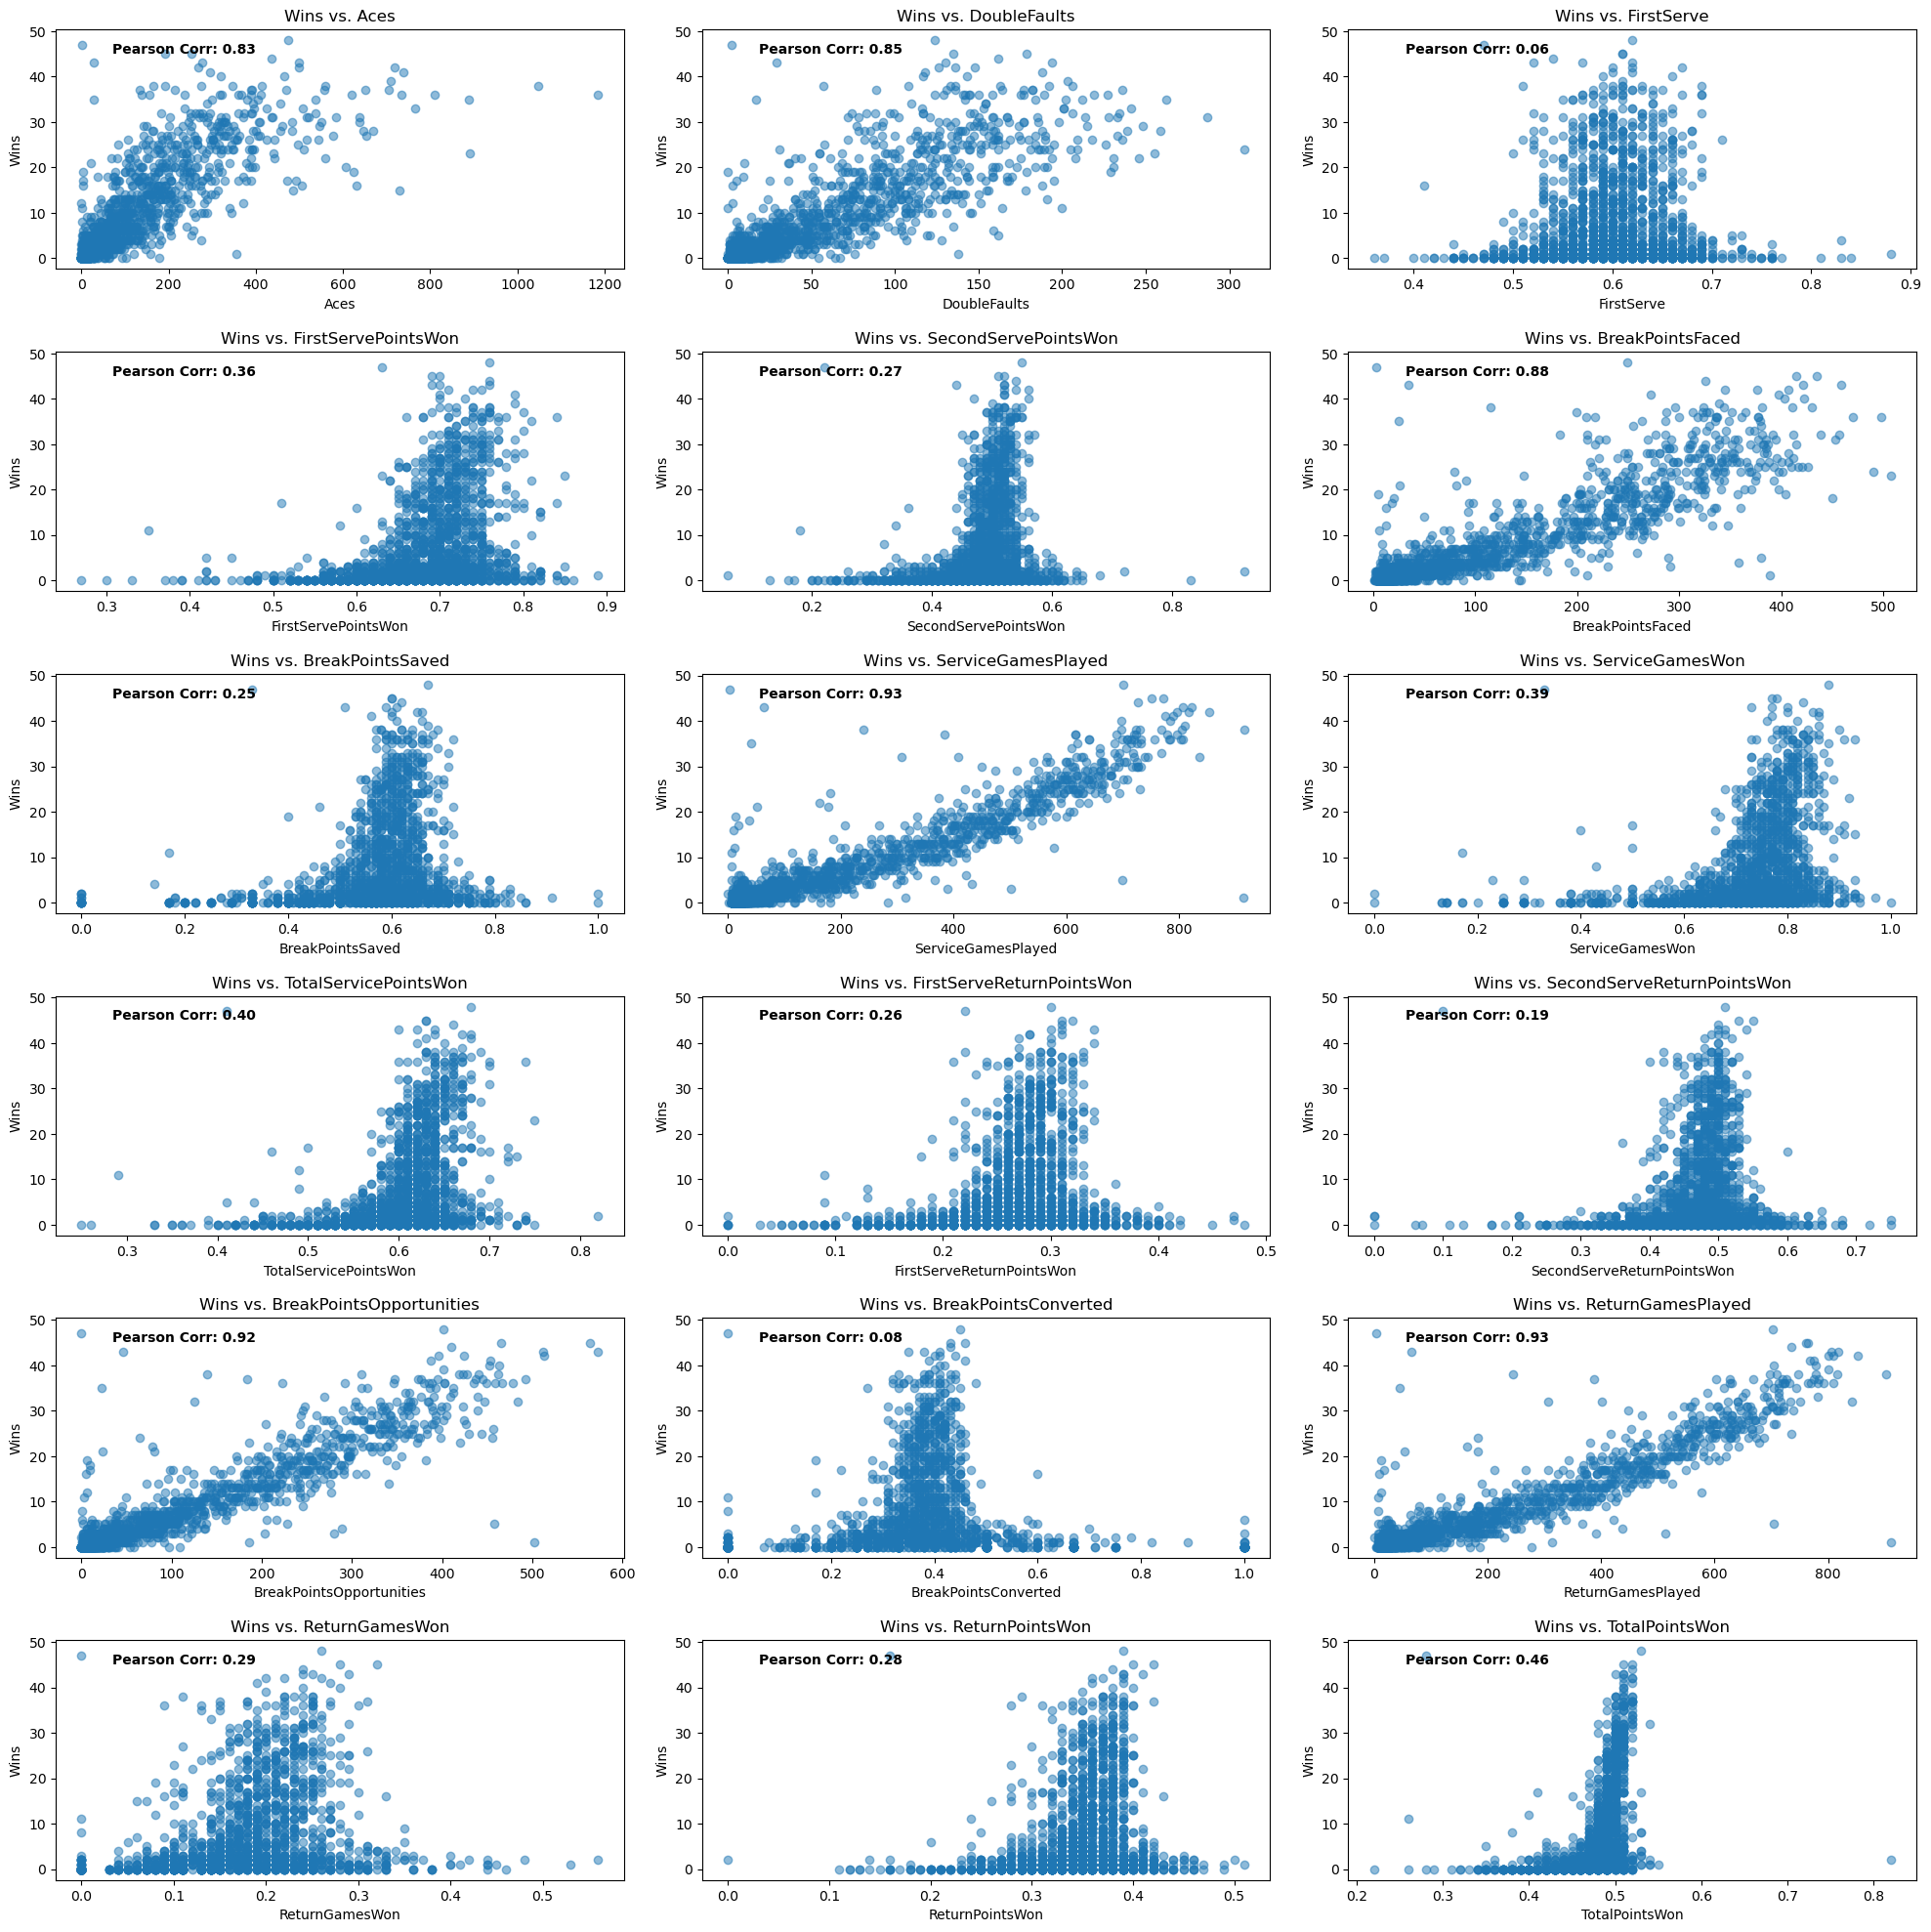

In [184]:
# Create the subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 20))

# Flatten the axes array to loop through it with a single index
axes = axes.flatten()

# Loop through the X variables and plot Y vs. each X variable
for i, ax in enumerate(axes):
        ax.scatter(X[i], Y, alpha=0.5)
        ax.set_xlabel(X_name[i])
        ax.set_ylabel("Wins")
        ax.set_title(f'Wins vs. {X_name[i]}')

        # Calculate Pearson correlation coefficient
        correlation_coefficient = np.corrcoef(X[i], Y)[0, 1]

        # Display the correlation coefficient on the plot
        ax.text(0.1, 0.9, f"Pearson Corr: {correlation_coefficient:.2f}", transform=ax.transAxes, fontsize=10, fontweight='bold')

# Adjust the layout and add space between subplots
plt.tight_layout(pad=1.5)

# Show the plot
plt.show()


Let's build a single feature linear regression model. Based of the graphs it seems like the number of aces correlates well to the number of wins so lets start with this.

R-squared: 0.7040464274028804


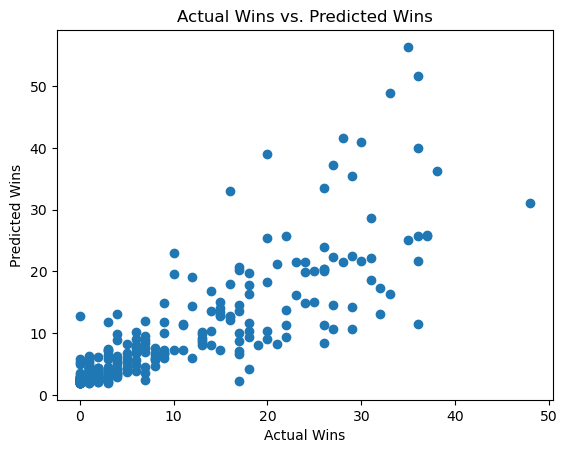

In [185]:
features = np.array(tennis_stats["Aces"]).reshape(-1,1)
outcome = np.array(tennis_stats["Wins"]).reshape(-1,1)

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size=0.8)

model = LinearRegression()
model.fit(features_train, outcome_train)

# Calculate the coefficient of determination (R^2) on the test set
r_squared = model.score(features_test, outcome_test)
print("R-squared:", r_squared)

# Make predictions on the test set
prediction = model.predict(features_test)

# Plot the scatter plot
plt.scatter(outcome_test, prediction)
plt.xlabel("Actual Wins")
plt.ylabel("Predicted Wins")
plt.title("Actual Wins vs. Predicted Wins")
plt.show()


R-squared: 0.7833182139527368


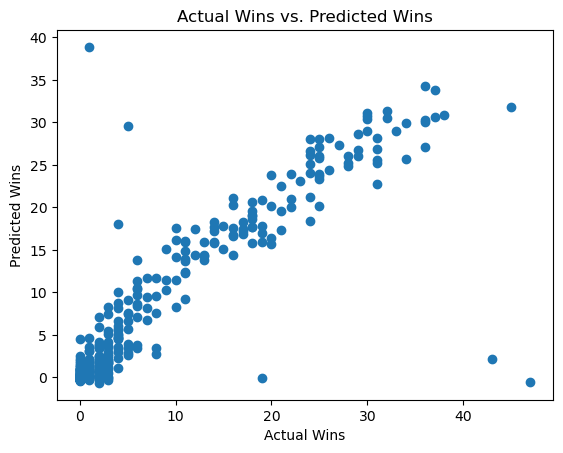

In [186]:
features = np.array(tennis_stats["ServiceGamesPlayed"]).reshape(-1,1)
outcome = np.array(tennis_stats["Wins"]).reshape(-1,1)

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size=0.8)

model = LinearRegression()
model.fit(features_train, outcome_train)

# Calculate the coefficient of determination (R^2) on the test set
r_squared = model.score(features_test, outcome_test)
print("R-squared:", r_squared)

# Make predictions on the test set
prediction = model.predict(features_test)

# Plot the scatter plot
plt.scatter(outcome_test, prediction)
plt.xlabel("Actual Wins")
plt.ylabel("Predicted Wins")
plt.title("Actual Wins vs. Predicted Wins")
plt.show()


Building a multiple linear regression model based on the features that correlate well with the win outcome

R-squared: 0.7773732766893077


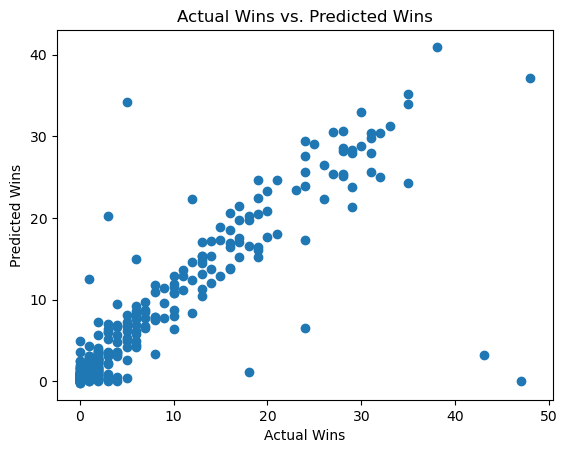

[[ 8  0  2  7  7  9]
 [ 9  7  1  7  0  9]
 [17  2  1 10  8 19]
 ...
 [14  4  4 13  4 14]
 [ 6  1  1  5  5  7]
 [ 8  1  7  8  9  9]]


In [187]:
# Create a list of the features you want to include in the array
feature_columns = [
    "ServiceGamesPlayed",
    "Aces",
    "DoubleFaults",
    "BreakPointsFaced",
    "BreakPointsOpportunities",
    "ReturnGamesPlayed"
]

# Use the list of feature columns to extract the corresponding data from tennis_stats
features = np.array(tennis_stats[feature_columns])
outcome = np.array(tennis_stats["Wins"]).reshape(-1, 1)

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size=0.8)

model = LinearRegression()
model.fit(features_train, outcome_train)

# Calculate the coefficient of determination (R^2) on the test set
r_squared = model.score(features_test, outcome_test)
print("R-squared:", r_squared)

# Make predictions on the test set
prediction = model.predict(features_test)

# Plot the scatter plot
plt.scatter(outcome_test, prediction)
plt.xlabel("Actual Wins")
plt.ylabel("Predicted Wins")
plt.title("Actual Wins vs. Predicted Wins")
plt.show()

print(features)

In this section we will now build a multiple regression model to predict the rankings of a player based on the features

In [188]:
Y = tennis_stats["Winnings"]
X = [tennis_stats["Aces"], tennis_stats["DoubleFaults"], tennis_stats["FirstServe"],
     tennis_stats["FirstServePointsWon"], tennis_stats["SecondServePointsWon"],
     tennis_stats["BreakPointsFaced"], tennis_stats["BreakPointsSaved"],
     tennis_stats["ServiceGamesPlayed"], tennis_stats["ServiceGamesWon"],
     tennis_stats["TotalServicePointsWon"], tennis_stats["FirstServeReturnPointsWon"],
     tennis_stats["SecondServeReturnPointsWon"], tennis_stats["BreakPointsOpportunities"],
     tennis_stats["BreakPointsConverted"], tennis_stats["ReturnGamesPlayed"],
     tennis_stats["ReturnGamesWon"], tennis_stats["ReturnPointsWon"], tennis_stats["TotalPointsWon"]]

X_name = ["Aces", "DoubleFaults", "FirstServe", "FirstServePointsWon",
          "SecondServePointsWon", "BreakPointsFaced", "BreakPointsSaved",
          "ServiceGamesPlayed", "ServiceGamesWon", "TotalServicePointsWon",
          "FirstServeReturnPointsWon", "SecondServeReturnPointsWon", "BreakPointsOpportunities",
          "BreakPointsConverted", "ReturnGamesPlayed", "ReturnGamesWon", "ReturnPointsWon",
          "TotalPointsWon"]

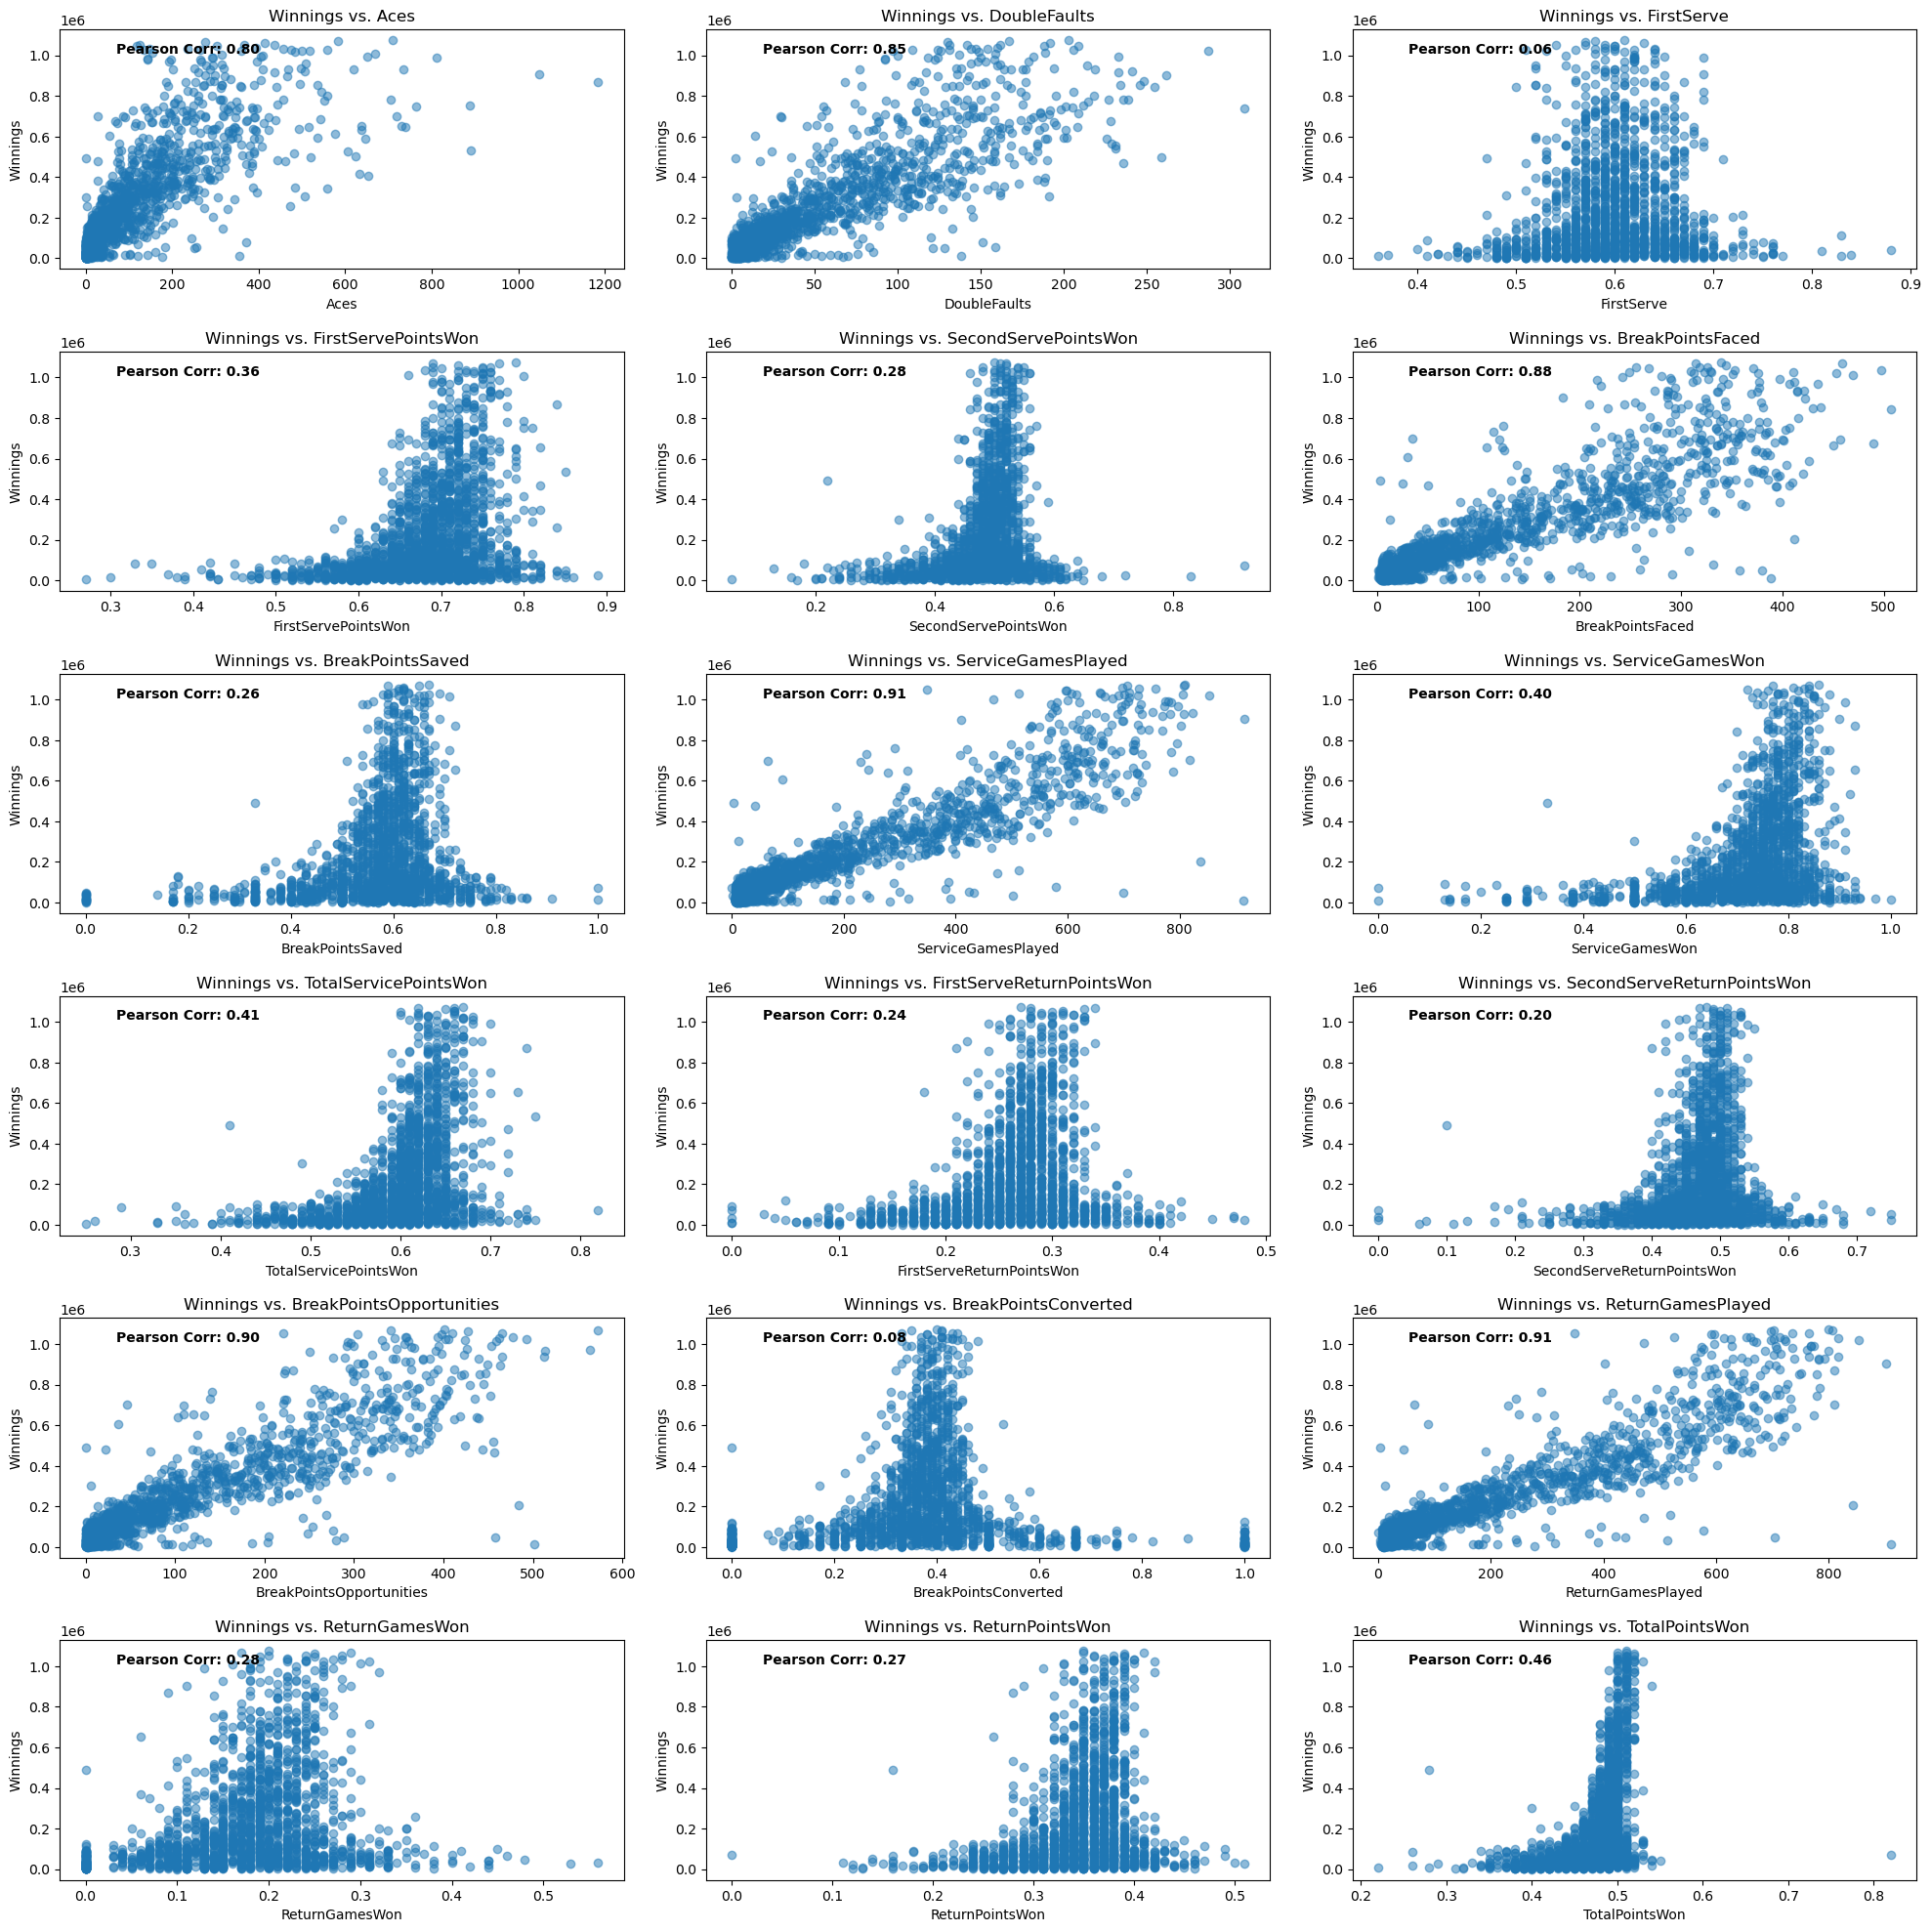

In [193]:
# Create the subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 20))

# Flatten the axes array to loop through it with a single index
axes = axes.flatten()

# Loop through the X variables and plot Y vs. each X variable
for i, ax in enumerate(axes):
        ax.scatter(X[i], Y, alpha=0.5)
        ax.set_xlabel(X_name[i])
        ax.set_ylabel("Winnings")
        ax.set_title(f'Winnings vs. {X_name[i]}')

        # Calculate Pearson correlation coefficient
        correlation_coefficient = np.corrcoef(X[i], Y)[0, 1]

        # Display the correlation coefficient on the plot
        ax.text(0.1, 0.9, f"Pearson Corr: {correlation_coefficient:.2f}", transform=ax.transAxes, fontsize=10, fontweight='bold')

# Adjust the layout and add space between subplots
plt.tight_layout(pad=1.5)

# Show the plot
plt.show()


R-squared: 0.8500910842014071


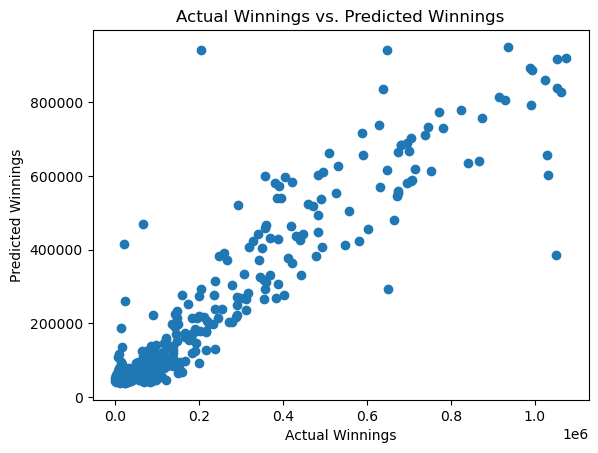

[[ 8  0  2  7  7  9]
 [ 9  7  1  7  0  9]
 [17  2  1 10  8 19]
 ...
 [14  4  4 13  4 14]
 [ 6  1  1  5  5  7]
 [ 8  1  7  8  9  9]]


In [191]:
# Create a list of the features you want to include in the array
feature_columns = [
    "ServiceGamesPlayed",
    "Aces",
    "DoubleFaults",
    "BreakPointsFaced",
    "BreakPointsOpportunities",
    "ReturnGamesPlayed"
]

# Use the list of feature columns to extract the corresponding data from tennis_stats
features = np.array(tennis_stats[feature_columns])
outcome = np.array(tennis_stats["Winnings"]).reshape(-1, 1)

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size=0.8)

model = LinearRegression()
model.fit(features_train, outcome_train)

# Calculate the coefficient of determination (R^2) on the test set
r_squared = model.score(features_test, outcome_test)
print("R-squared:", r_squared)

# Make predictions on the test set
prediction = model.predict(features_test)

# Plot the scatter plot
plt.scatter(outcome_test, prediction)
plt.xlabel("Actual Winnings")
plt.ylabel("Predicted Winnings")
plt.title("Actual Winnings vs. Predicted Winnings")
plt.show()

print(features)

Feel free to give any feedback and connect with me on Linkdein!